In [1]:
import jax.numpy as jnp
import jax

from jax.experimental import mesh_utils
from jax.sharding import Mesh, NamedSharding, PartitionSpec
import jax.numpy as jnp

import jaxquantum as jqt
jqt.set_precision("single")

jax.local_devices()

/home/phionx/miniconda3/envs/jqt-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0),
 TpuDevice(id=1, process_index=0, coords=(1,0,0), core_on_chip=0),
 TpuDevice(id=2, process_index=0, coords=(0,1,0), core_on_chip=0),
 TpuDevice(id=3, process_index=0, coords=(1,1,0), core_on_chip=0)]

# Diagonalization

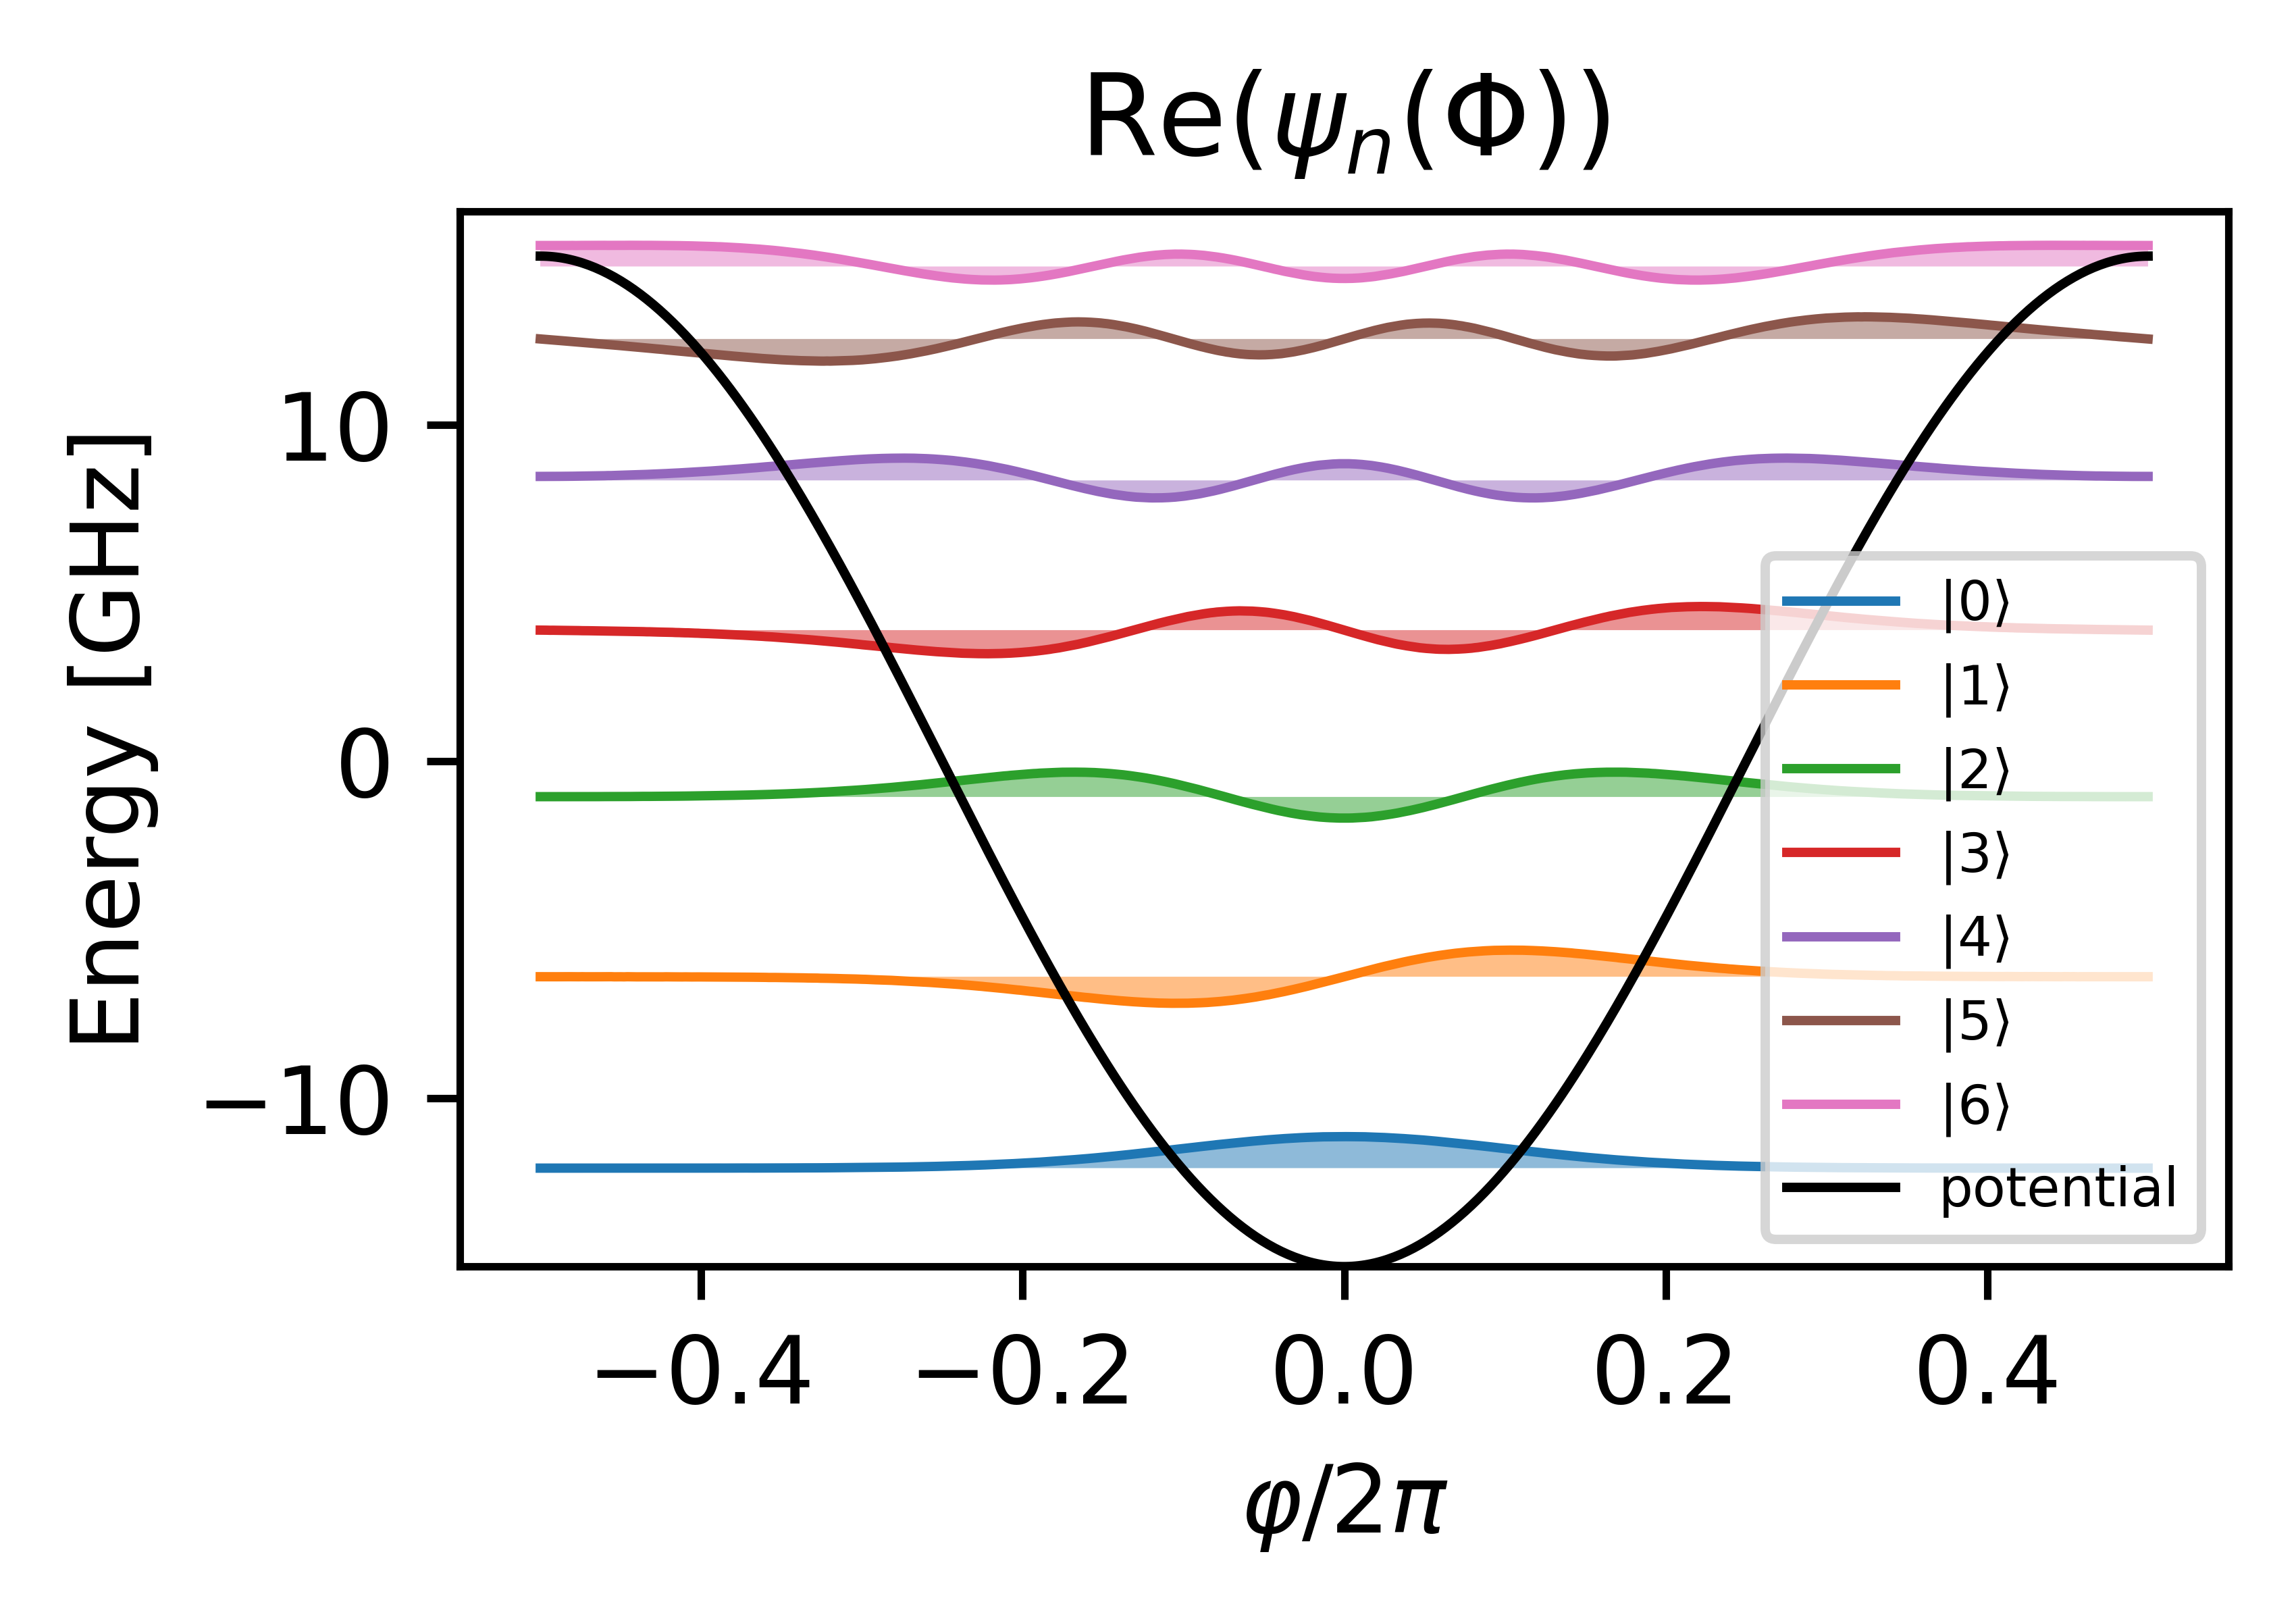

In [2]:
import jaxquantum.devices as jqd

jqt.set_precision("single")


Ec_q = 0.3
Ej_q = 15

qubit = jqd.Transmon.create(
    24,
    {"Ec": Ec_q, "Ej": Ej_q},
    N_pre_diag=25,
)

phi_vals = jnp.linspace(-0.5,0.5,500)
axs = qubit.plot_wavefunctions(phi_vals, max_n = 7, mode="real")

In [14]:
qubit.eig_systems["vals"], qubit.eig_systems["vals"].device

(Array([-12.077033 ,  -6.394459 ,  -1.0566479,   3.8959465,   8.341575 ,
         12.540326 ,  14.692739 ,  20.7174   ,  20.857224 ,  30.967705 ,
         30.969065 ,  43.862297 ,  43.862305 ,  59.28335  ,  59.28336  ,
         77.16878  ,  77.168785 ,  97.4908   ,  97.49083  , 120.2364   ,
        120.236404 , 145.4599   , 145.45992  , 174.77155  , 174.77158  ],      dtype=float32),
 TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0))

In [15]:
devices = jax.devices()
mesh = Mesh(mesh_utils.create_device_mesh((4,)), ('dp',))

x = qubit.get_H_full().data[:24,:24]

sharding = NamedSharding(mesh, PartitionSpec('dp', None))
x_sharded = jax.device_put(x, sharding)

import jax.scipy as jsp

a = jsp.linalg.eigh(x_sharded)

a[0], a[0].device

(Array([-12.077033 ,  -6.394458 ,  -1.0566485,   3.8959494,   8.341573 ,
         12.540321 ,  14.692736 ,  20.717403 ,  20.857225 ,  30.967709 ,
         30.969063 ,  43.862305 ,  43.862316 ,  59.28335  ,  59.28336  ,
         77.16877  ,  77.1688   ,  97.49082  ,  97.49262  , 120.236404 ,
        120.31957  , 145.45988  , 147.34642  , 174.77158  ], dtype=float32),
 NamedSharding(mesh=Mesh('dp': 4, axis_types=(Auto,)), spec=PartitionSpec('dp',), memory_kind=device))